Выведем центроиды при k = 10 и визуализируем соответствующую confusion matrix:


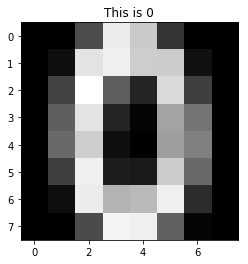

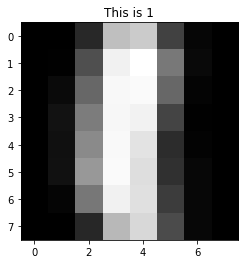

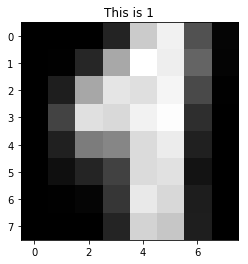

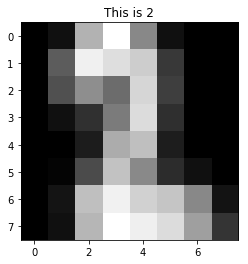

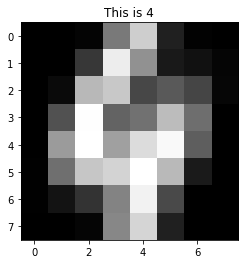

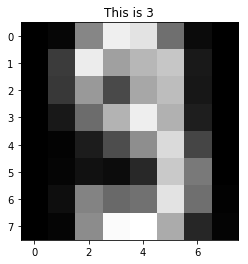

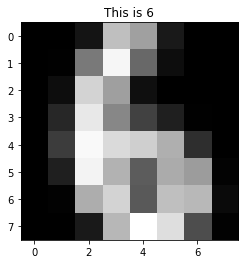

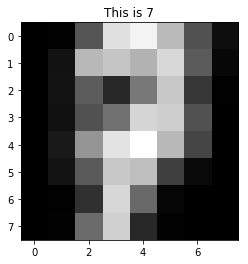

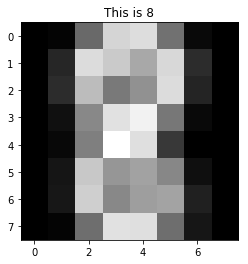

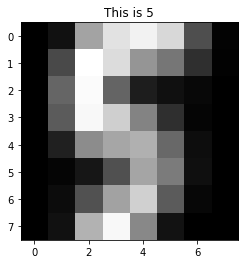

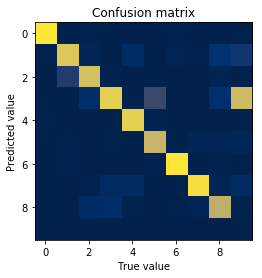

In [22]:
from sklearn.datasets import load_digits
digits = load_digits()

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans

def my_kmeans(A, k, s = 20, eps = 1e-05): 
    N = A.shape[0] #столько точек
    m = A.shape[1] #такая размерность
    centroids = A[:k, :] #выбираю изначально центроиды как первые k точек 
    A = np.expand_dims(A, axis = 1) #добавляю размерность посерединке
    centroids1 = np.zeros((k, m)) #вспомогательная матрица для сдвига центроидов
    i = 0
    distortion1 = 10 * eps
    distortion = eps #вспомогательный параметр для вычисления изменения distortion
    while np.abs(distortion1 - distortion) > eps and i < s:
        distortion1 = distortion
        centroids1 = centroids
        dif = A - centroids
        numcen = np.argmin((dif ** 2).sum(axis = 2), axis = 1) 
        C = np.zeros(N * m * k).reshape(N, k, m)
        C[np.arange(N), numcen, :] = dif[np.arange(N),  numcen, :] / np.bincount(numcen)[numcen].reshape(N, 1)
        centroids = centroids1 + np.squeeze(C.sum(axis = 0))        
        #найдены центроиды. ищем distortion 
        numcen = np.argmin(((A - centroids) ** 2).sum(axis = 2), axis = 1)
        C = np.zeros(N * m * k).reshape(N, k, m)
        C[np.arange(N), numcen, :] = (A - centroids)[np.arange(N),  numcen, :]
        distortion = ((C ** 2).sum(axis = 2)).sum(axis = 1).mean() 
        i = i + 1        
    return centroids, distortion

N = 32
error = np.zeros(N)
A = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])
print('Выведем центроиды при k = 10 и визуализируем соответствующую confusion matrix:')
for k in range(1, N):    
    
    centroids = my_kmeans(A, k)[0]
    numcen = np.argmin(((np.expand_dims(A, axis = 1) - centroids) ** 2).sum(axis = 2), axis = 1)

    num_centroids = np.arange(k)    
    conf_matrix = np.zeros(100).reshape(10, 10)

    for s in range(k):
        c = digits.target[numcen == s]
        num_centroids[s] = np.argmax(np.bincount(digits.target[numcen == s])) 
        error[k] = error[k] + np.sum(np.bincount(c)) - len(c[c == num_centroids[s]])    
        if k == 10:           
            plt.imshow(centroids[s].reshape(8, 8), cmap='gray')
            plt.title('This is {}'.format(num_centroids[s]))
            plt.show()
            for i in range(10):
                for j in range(10):
                    conf_matrix[i, j] = conf_matrix[i, j] + np.sum((num_centroids[numcen][numcen == s] == i) & (digits.target[numcen == s] == j))    
    if k == 10:
        plt.imshow(conf_matrix, cmap='cividis')
        plt.title('Confusion matrix')
        plt.ylabel('Predicted value')
        plt.xlabel('True value')
        plt.show()

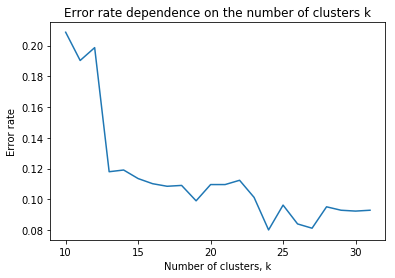

In [23]:
error = error / digits.images.shape[0]
plt.plot(np.arange(N)[10:], error[10:])
plt.title('Error rate dependence on the number of clusters k')
plt.ylabel('Error rate')
plt.xlabel('Number of clusters, k')
plt.show()

In [24]:
print('На "оптимальность" k влияют два фактора: k не должно сильно превосходить 10; error rate должен быть как можно меньше. \n')
print('На графике мы видим, что основные претенденты на "оптимальный" k - это k = 19 и k = 24. \n')
print('Выберем в качестве оптимального k = 19. \n')
print('При k = 19, error rate = ', error[19]) 

На "оптимальность" k влияют два фактора: k не должно сильно превосходить 10; error rate должен быть как можно меньше. 

На графике мы видим, что основные претенденты на "оптимальный" k - это k = 19 и k = 24. 

Выберем в качестве оптимального k = 19. 

При k = 19, error rate =  0.09905397885364496


При k = 19, центроиды выглядят следующим образом:


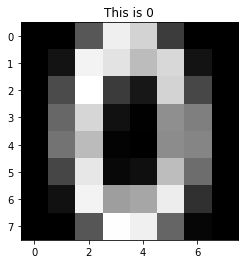

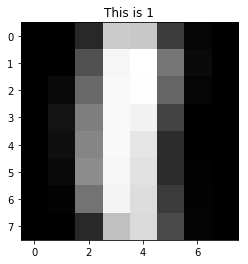

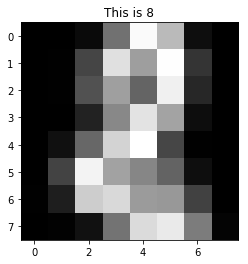

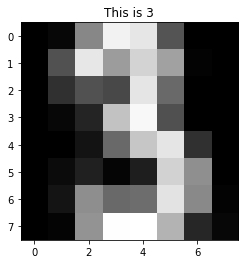

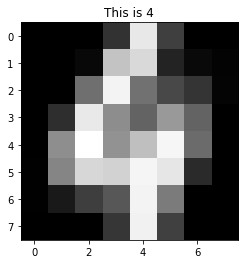

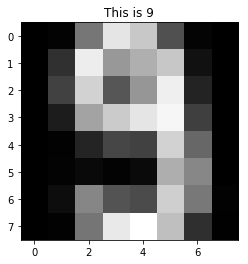

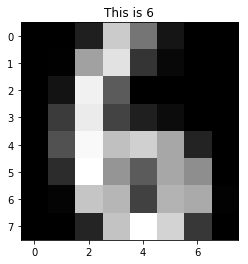

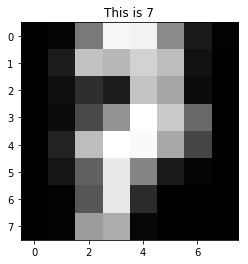

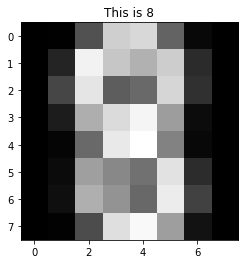

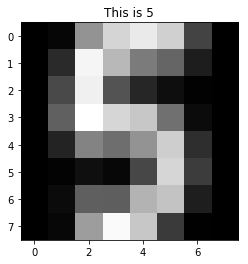

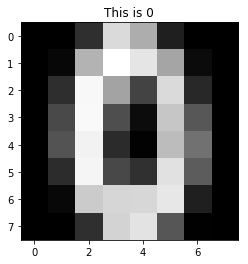

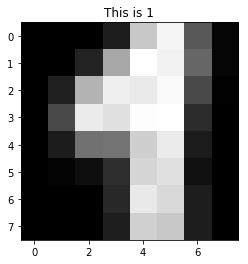

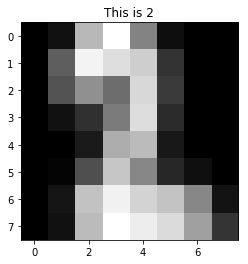

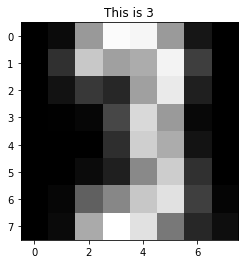

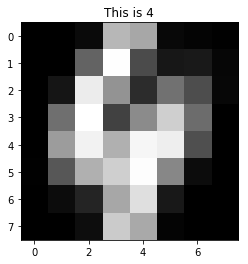

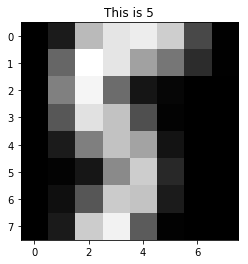

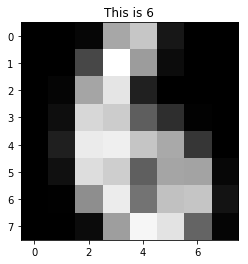

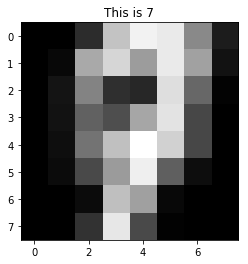

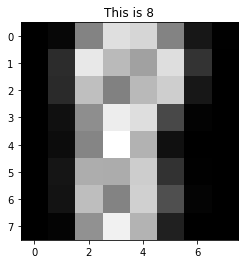

In [25]:
print('При k = 19, центроиды выглядят следующим образом:') 

centroids = my_kmeans(A, 19)[0]
numcen = np.argmin(((np.expand_dims(A, axis = 1) - centroids) ** 2).sum(axis = 2), axis = 1)
num_centroids = np.arange(19)    
conf_matrix = np.zeros(100).reshape(10, 10)

for s in range(19):
    c = digits.target[numcen == s]
    num_centroids[s] = np.argmax(np.bincount(digits.target[numcen == s]))                
    plt.imshow(centroids[s].reshape(8, 8), cmap='gray')
    plt.title('This is {}'.format(num_centroids[s]))
    plt.show()
    for i in range(10):
        for j in range(10):
            conf_matrix[i, j] = conf_matrix[i, j] + np.sum((num_centroids[numcen][numcen == s] == i) & (digits.target[numcen == s] == j)) 

In [26]:
print('Центроиды соответствуют следующим цифрам:', num_centroids)
print('Вспомогательный массив:', np.bincount(num_centroids))
print('Каждый кластер встретился хотя бы один раз - очень хорошо; по одном разу встретились 2-кластер и 9-кластер.')


Центроиды соответствуют следующим цифрам: [0 1 8 3 4 9 6 7 8 5 0 1 2 3 4 5 6 7 8]
Вспомогательный массив: [2 2 1 2 2 2 2 2 3 1]
Каждый кластер встретился хотя бы один раз - очень хорошо; по одном разу встретились 2-кластер и 9-кластер.


Выведем confusion matrix для k = 19:


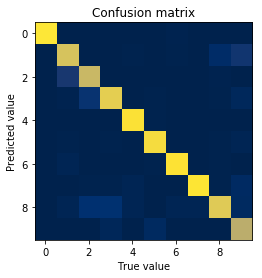

In [27]:
print('Выведем confusion matrix для k = 19:')
plt.imshow(conf_matrix, cmap='cividis')
plt.title('Confusion matrix')
plt.ylabel('Predicted value')
plt.xlabel('True value')
plt.show()

In [28]:
print('Видим, что с большой точностью угадываются значения 4-7; с наименьшей точностью угадываются 1, 2 и 9.')

Видим, что с большой точностью угадываются значения 4-7; с наименьшей точностью угадываются 1, 2 и 9.
